In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import plotly.express as px

# Data cleaning

In [2]:
wine = pd.read_csv("wines_SPA.csv")

In [3]:
wine

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [5]:
wine.acidity.unique()

array([ 3.,  2.,  1., nan])

In [6]:
wine.acidity.value_counts()

3.0    6028
2.0     268
1.0      35
Name: acidity, dtype: int64

In [7]:
wine.loc[wine.body.isna()]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN,NaN
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN,NaN
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN,NaN
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN,NaN
288,Francisco Garcia Perez,Adega do Moucho Treixadura,2017,4.6,53,Espana,Ribeiro,34.50000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7440,Binigrau,Nounat,2020,4.2,404,Espana,Mallorca,19.90000,NaN,NaN,NaN
7462,Ramon do Casar,Treixadura,2020,4.2,407,Espana,Ribeiro,11.95000,NaN,NaN,NaN
7465,Binigrau,Nounat,2020,4.2,404,Espana,Mallorca,19.90000,NaN,NaN,NaN
7487,Ramon do Casar,Treixadura,2020,4.2,407,Espana,Ribeiro,11.95000,NaN,NaN,NaN


In [8]:
wine.type = wine.type.fillna("Red")    

In [9]:
wine.body = wine.body.fillna("0").astype(float)

In [10]:
wine.acidity = wine.acidity.fillna("0").astype(float)

In [11]:
wine.acidity.unique()

array([3., 2., 1., 0.])

In [12]:
index = wine.loc[wine.wine.str.contains("Blanco")].wine.index

In [13]:
red_wine = wine.drop(index).copy()

In [14]:
wine.type.unique()

array(['Toro Red', 'Tempranillo', 'Ribera Del Duero Red', 'Pedro Ximenez',
       'Red', 'Sherry', 'Priorat Red', 'Rioja Red', 'Rioja White',
       'Grenache', 'Cava', 'Verdejo', 'Syrah', 'Monastrell', 'Mencia',
       'Sparkling', 'Montsant Red', 'Albarino', 'Chardonnay',
       'Cabernet Sauvignon', 'Sauvignon Blanc'], dtype=object)

In [15]:
index1 = red_wine.loc[red_wine.type == "Rioja White"].index

In [16]:
clear_red_wine = red_wine.drop(index1)

In [17]:
clear_red_wine.price = clear_red_wine.price.astype(int)

In [18]:
red = clear_red_wine

In [19]:
# Before I drop unnecessary data and got only red wine
red

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64,Ribera Del Duero Red,5.0,3.0


In [20]:
#red.year = red.year.str.replace("2000","2001",regex = False)

In [21]:
red.year[851] = 2012

/var/folders/xf/_9db89vs2kz_xgykl0vhztn80000gn/T/ipykernel_11579/1085282835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red.year[851] = 2012


In [22]:
red.year[851]

2012

In [23]:
red.year[46] = 2021

/var/folders/xf/_9db89vs2kz_xgykl0vhztn80000gn/T/ipykernel_11579/3997845044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red.year[46] = 2021


In [24]:
red.year = red.year.str.replace("N.V.","2001", regex = False)

In [43]:
red.drop(index = [46,851], inplace = True)

In [45]:
red.year = red.year.astype(int)

# EDA

In [46]:
red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7382 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7382 non-null   object 
 1   wine         7382 non-null   object 
 2   year         7382 non-null   int64  
 3   rating       7382 non-null   float64
 4   num_reviews  7382 non-null   int64  
 5   country      7382 non-null   object 
 6   region       7382 non-null   object 
 7   price        7382 non-null   int64  
 8   type         7382 non-null   object 
 9   body         7382 non-null   float64
 10  acidity      7382 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 692.1+ KB


<AxesSubplot:xlabel='price'>

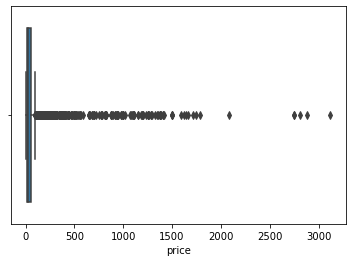

In [47]:
sns.boxplot(data = red, x = "price")

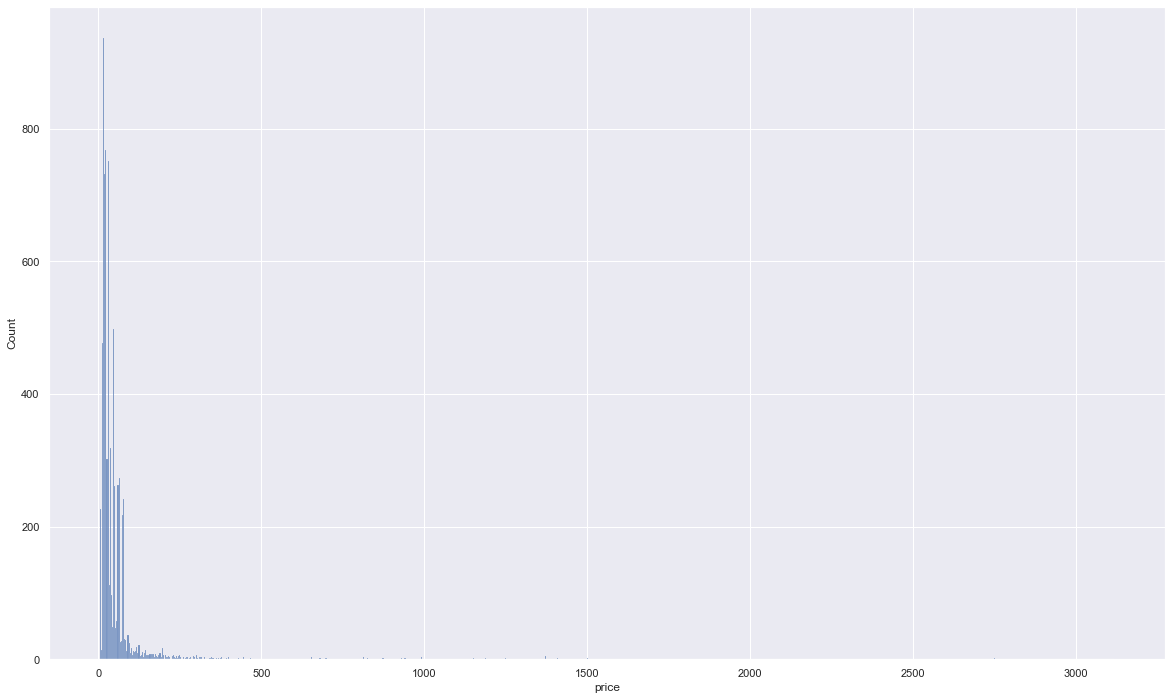

In [58]:
# Quantity of bottles in price range
sns.set(rc = {"figure.figsize" : (20,12) })
sns.histplot(red.price)
plt.show()

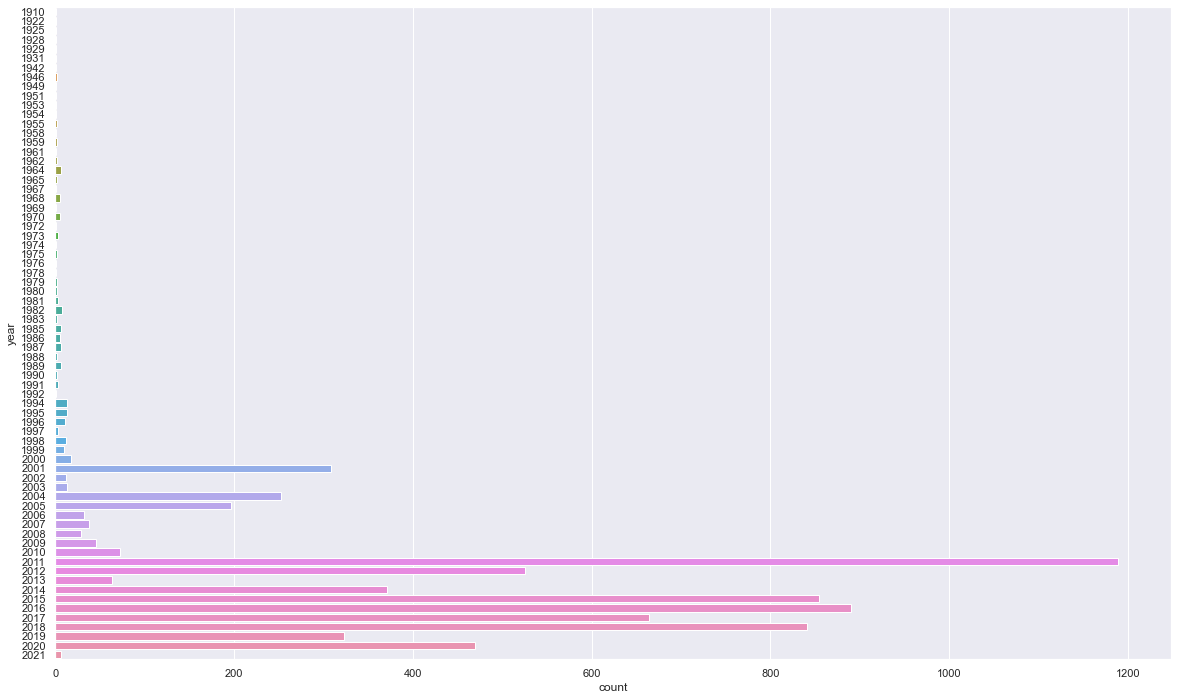

In [59]:
# Quantity of bottles in range by year
sns.countplot(data = red, y = "year")
plt.show()

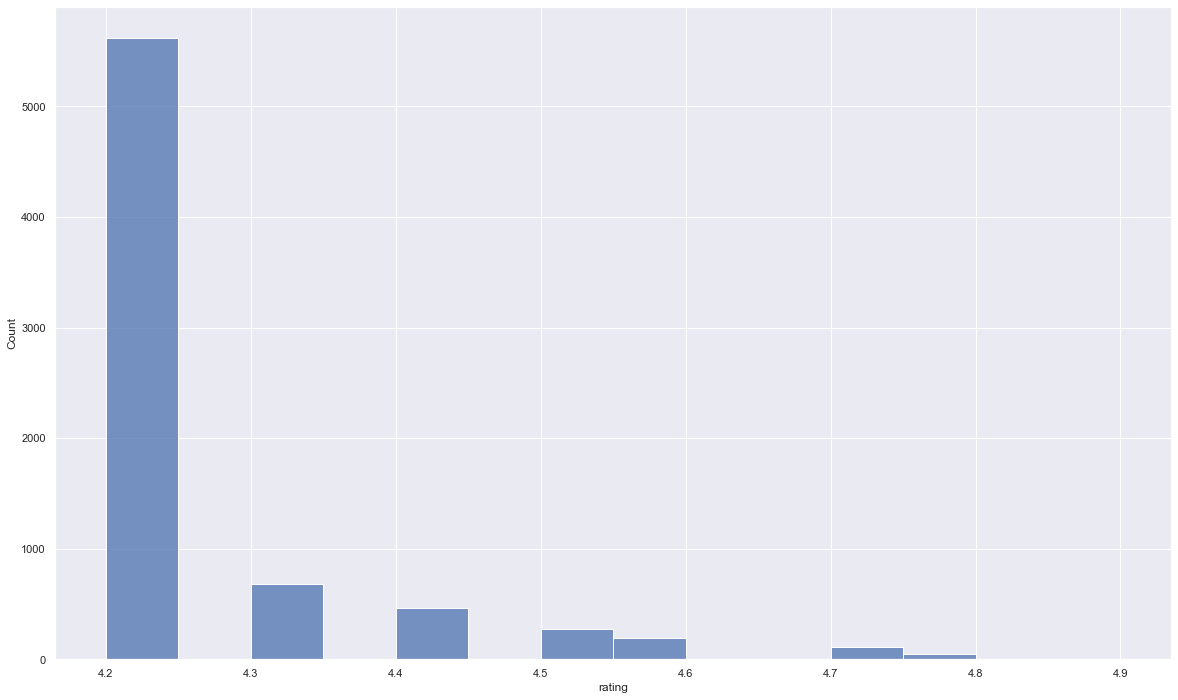

In [61]:
# Quantity of bottles in range by rating
sns.histplot(data = red, x = "rating")
plt.show()

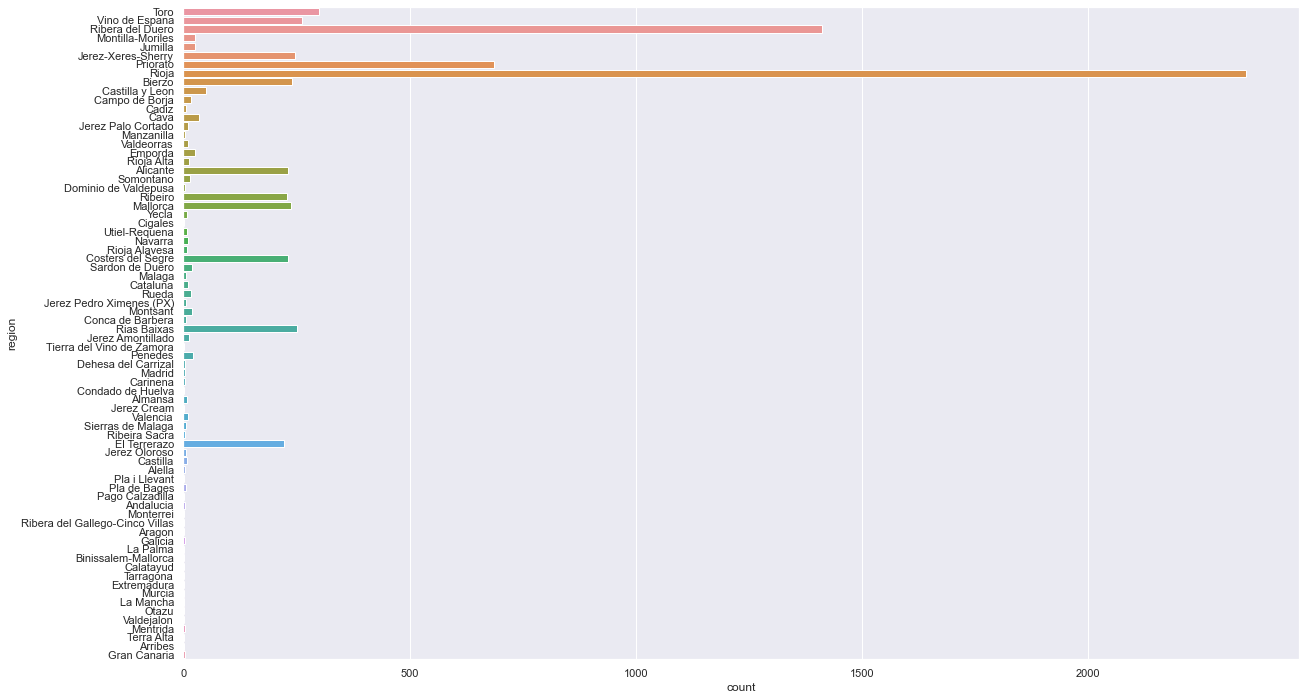

In [63]:
# Quantity of bottles in range by Region
sns.countplot(data = red,y = "region")
plt.show()

# Vizualizations

In [65]:
# I decided to classify wine with vinegar into 5 groups

wine_wine = [] 
for i in red["price"]:
    if 100 >= i :
        wine_wine.append("1~100")
    elif 101 <= i <499:
        wine_wine.append("101~499")
    elif 500 <= i < 1000:
        wine_wine.append("500~1000")
    elif 1001 <= i < 1600:
        wine_wine.append("1001~1600")
    elif  i > 1601: 
        wine_wine.append("1601+")
    else:
        wine_wine.append("problem")
#wine_wine

In [66]:
red["price_category"] = wine_wine

In [67]:
red.price_category.unique()

array(['500~1000', '101~499', '1601+', '1001~1600', '1~100'], dtype=object)

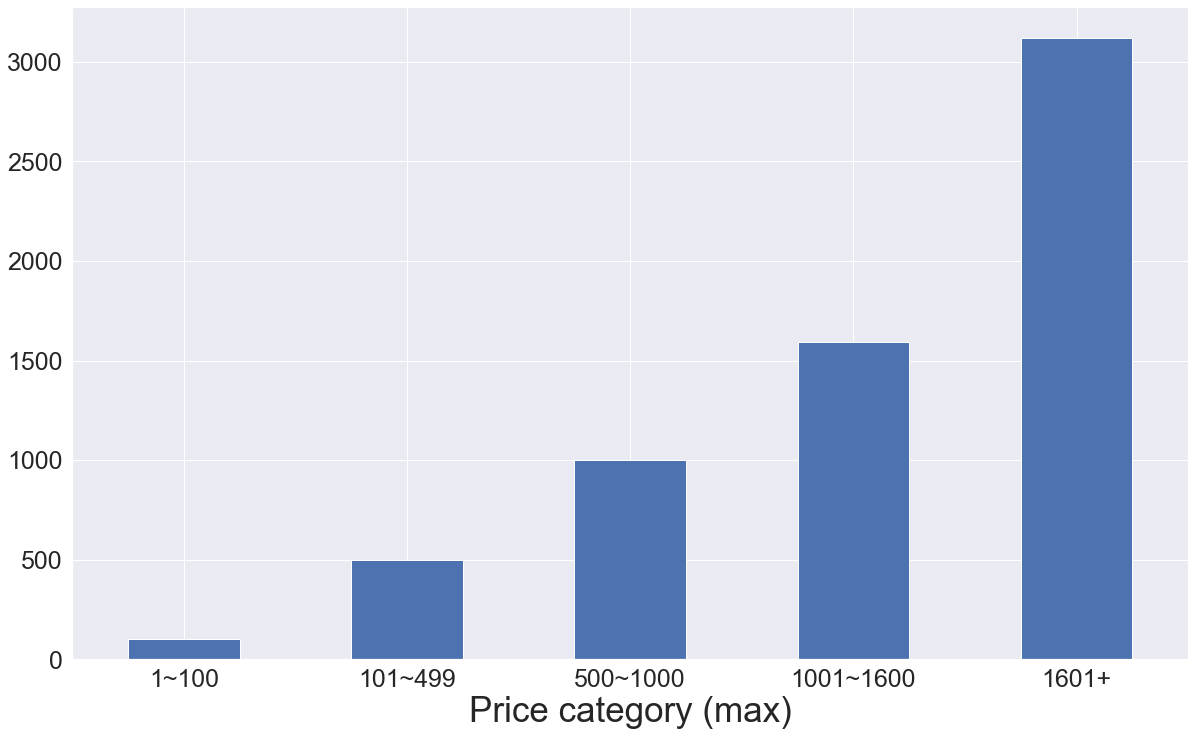

In [68]:
red.groupby("price_category").price.max().sort_values().plot(kind = "bar", figsize = (20,12))
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25, rotation = 0)
plt.xlabel("Price category (max)", fontsize =35)
plt.show()

In [69]:
red.groupby("price_category").price.min().sort_values()

price_category
1~100           4
101~499       101
500~1000      500
1001~1600    1021
1601+        1620
Name: price, dtype: int64

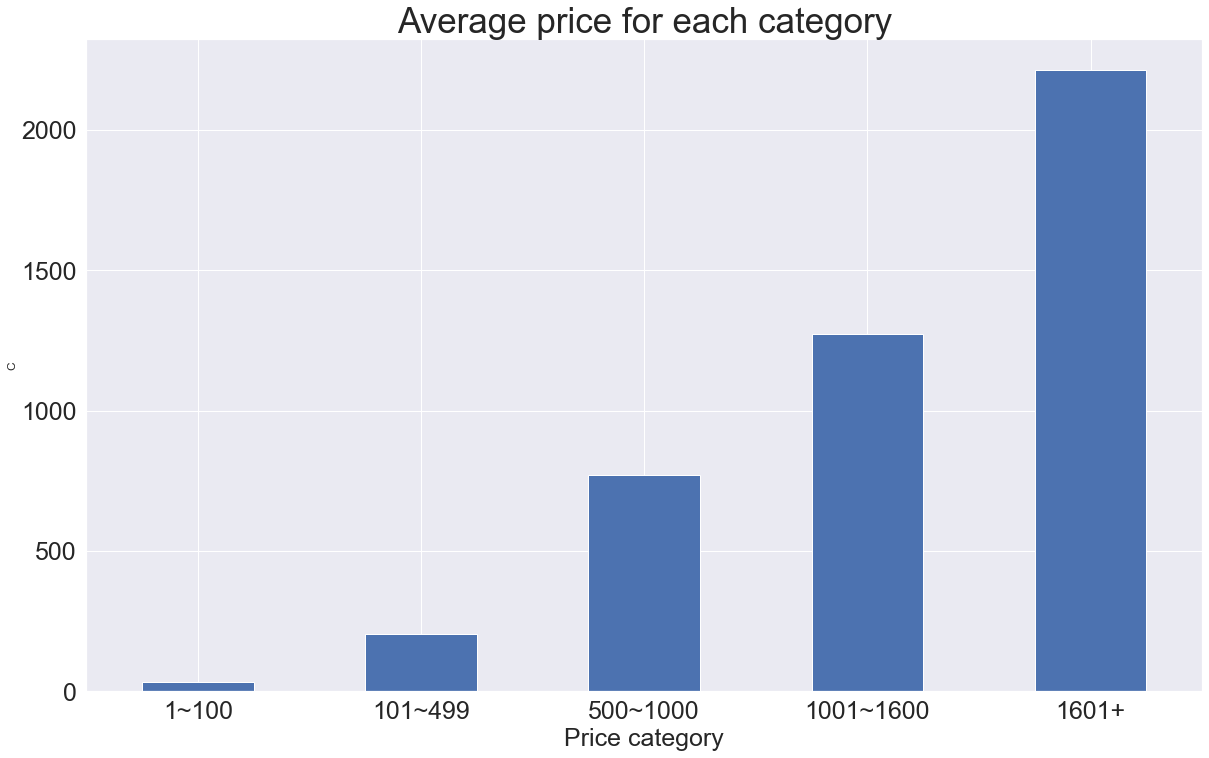

In [70]:
red.groupby("price_category").price.mean().sort_values().plot(kind = "bar", figsize = (20,12))
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25, rotation = 0)
plt.xlabel("Price category", fontsize =25)
plt.ylabel("C")
plt.title("Average price for each category", fontsize = 35)
plt.show()

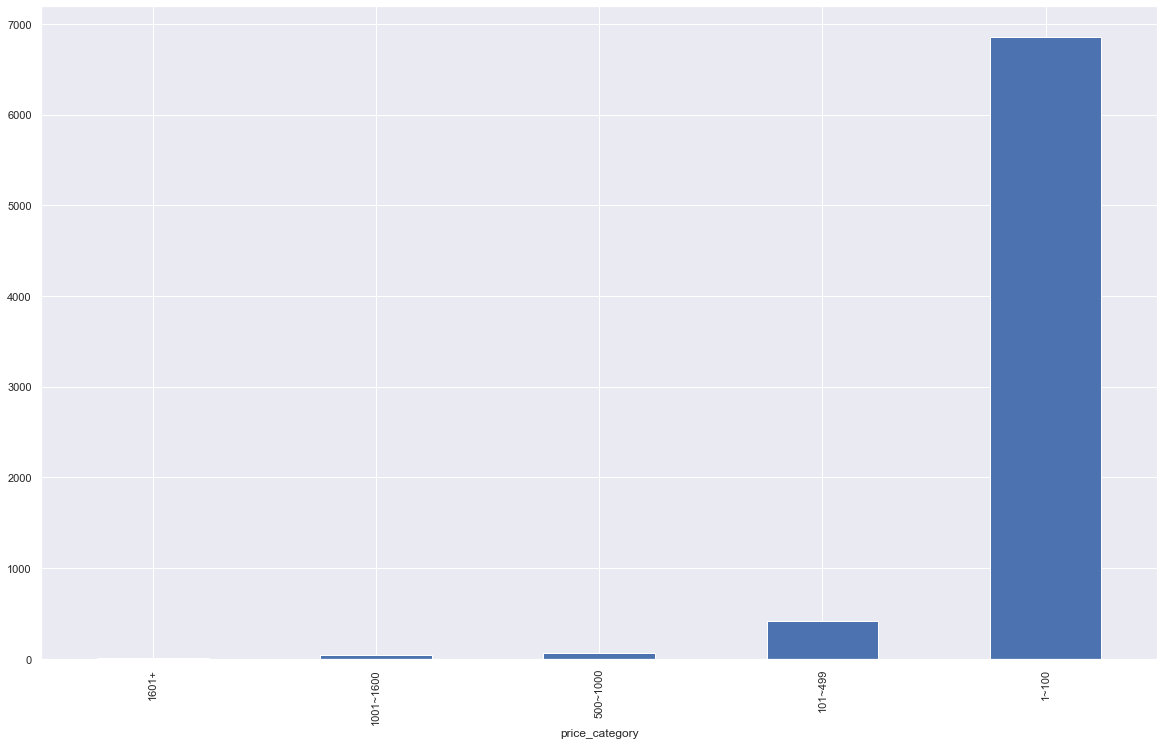

In [72]:
# Quantify bottles for each group
red.groupby("price_category").price.count().sort_values().plot(kind = "bar", figsize = (20,12))
plt.ylabel("")
plt.show()

/var/folders/xf/_9db89vs2kz_xgykl0vhztn80000gn/T/ipykernel_11579/2380608567.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  red.groupby("year")["price","wine","winery"].min().plot(kind="bar")


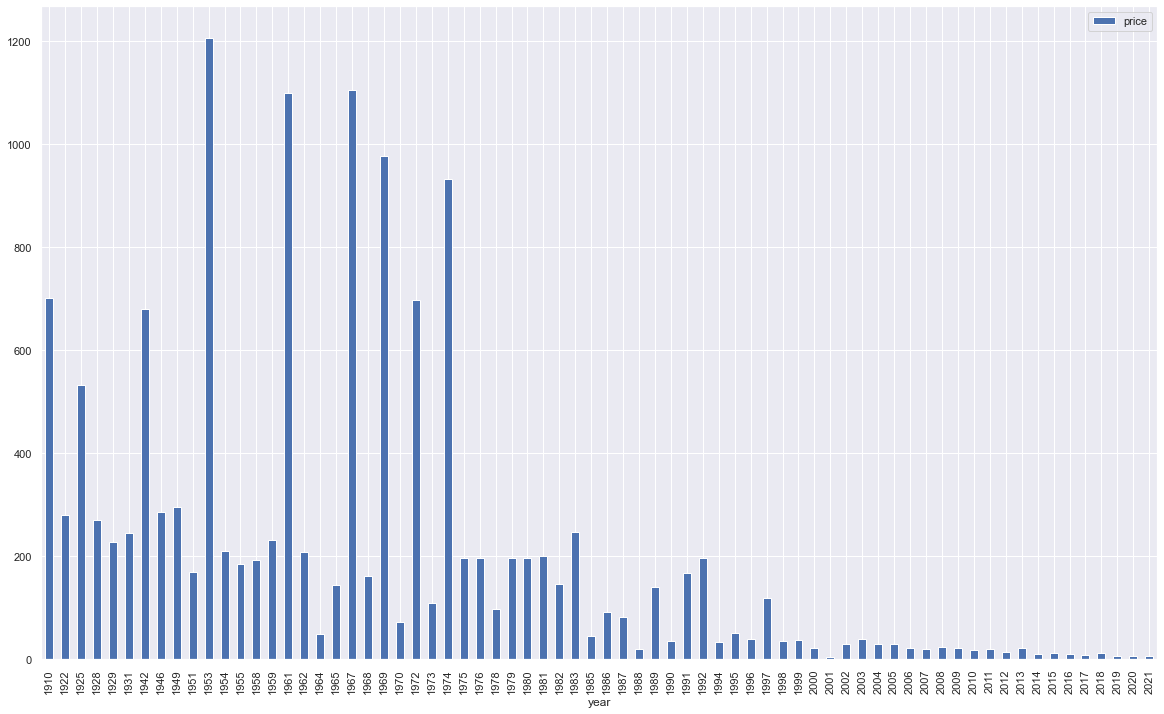

In [81]:
red.groupby("year")["price","wine","winery"].min().plot(kind="bar")
plt.show()

/var/folders/xf/_9db89vs2kz_xgykl0vhztn80000gn/T/ipykernel_11579/695688049.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  red.groupby("year")["price","wine","winery","region"].max().plot(kind="bar")


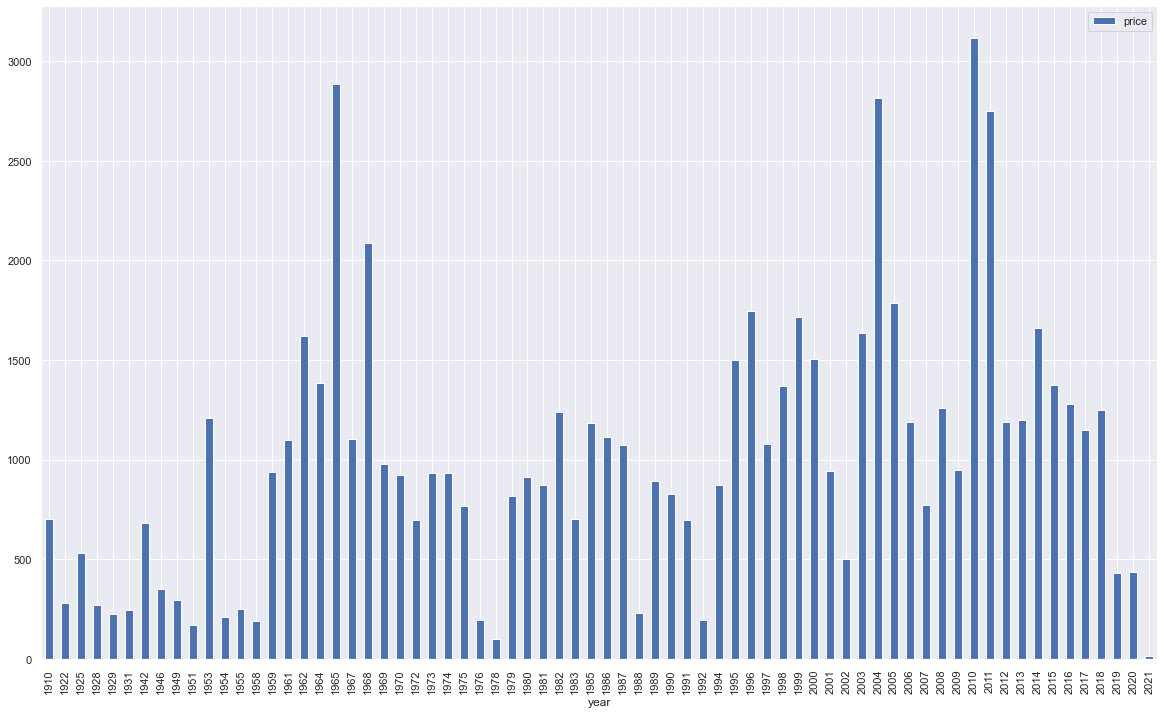

In [88]:
red.groupby("year")["price","wine","winery","region"].max().plot(kind="bar")
plt.show()

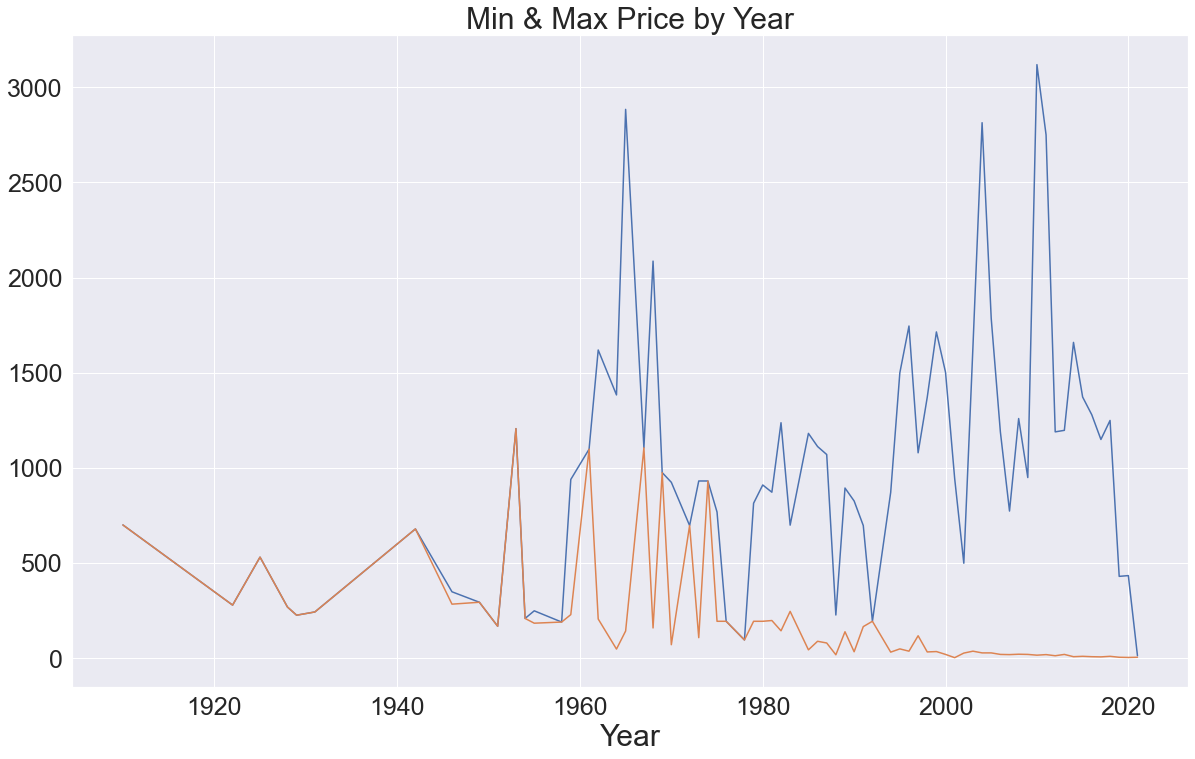

In [89]:
# The trend of winemaking development between min & max price by Year

red.groupby("year")["price"].max().plot(figsize = (20,12))
red.groupby("year")["price"].min().plot(figsize = (20,12))

plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.xlabel("Year", fontsize =30)
plt.title("Min & Max Price by Year", fontsize = 30)

plt.show()

In [92]:
# Top 3 bottles by rating in category between 1001-1600eu
list(red.groupby("price_category")[["rating","winery","wine",
                                    "price"]])[0][1].sort_values("rating",ascending = False)[0:3]#.plot(kind= "bar")

,rating,winery,wine,price
22,4.8,Dominio de Pingus,Pingus,1280
31,4.8,Vega Sicilia,Unico Reserva Especial Edicion,1182
35,4.8,Teso La Monja,Tinto,1190


In [93]:
# Top 3 bottles by rating in category between 101-499eu
list(red.groupby("price_category")[["rating","winery","wine",
                                    "price"]])[1][1].sort_values("rating",ascending = False)[0:3]

,rating,winery,wine,price
1,4.9,Artadi,Vina El Pison,313
18,4.8,Bodegas El Nido,El Nido,195
2,4.8,Vega Sicilia,Unico,324


In [94]:
# Top 3 bottles by rating in category after 1601eu
list(red.groupby("price_category")[["rating","winery","wine",
                                    "price"]])[2][1].sort_values("rating",ascending = False)[0:3]

,rating,winery,wine,price
16,4.8,Vega Sicilia,Unico,1620
92,4.7,Vega Sicilia,Unico,2087
98,4.7,Dominio de Pingus,Pingus,1715


In [95]:
# Top 3 bottles by rating in category between 1-100eu
list(red.groupby("price_category")[["rating","winery","wine",
                                    "price"]])[3][1].sort_values("rating",ascending = False)[0:3]

,rating,winery,wine,price
69,4.7,Pago de Carraovejas,El Anejon,75
139,4.7,Bodegas Amaren,El Regollar,77
76,4.7,Vinedos de Paganos,La Nieta,82


In [96]:
# Top wine by rating between 500-100eu
list(red.groupby("price_category")[["rating","winery","wine",
                                    "price"]])[4][1].sort_values("rating",ascending = False)[0:3]

,rating,winery,wine,price
0,4.9,Teso La Monja,Tinto,995
24,4.8,Vega Sicilia,Unico Reserva Especial Edicion,719
3,4.8,Vega Sicilia,Unico,692


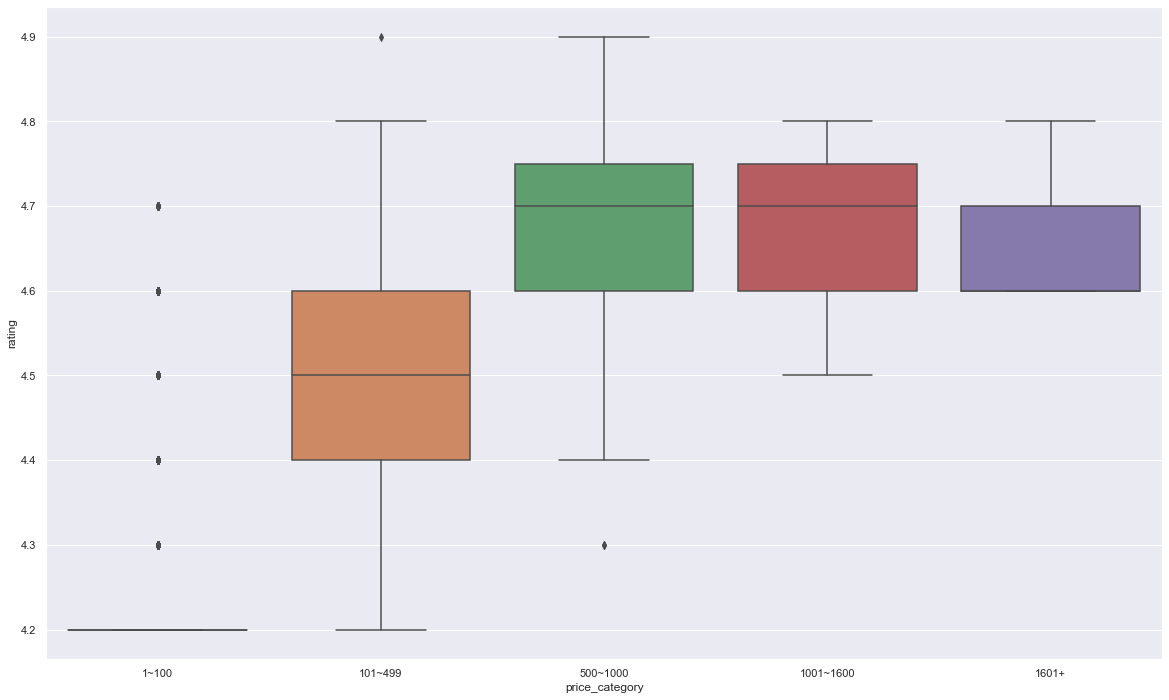

In [99]:
sns.boxplot(data =red, x = "price_category", y = "rating", order=['1~100','101~499','500~1000','1001~1600','1601+'])
plt.show()

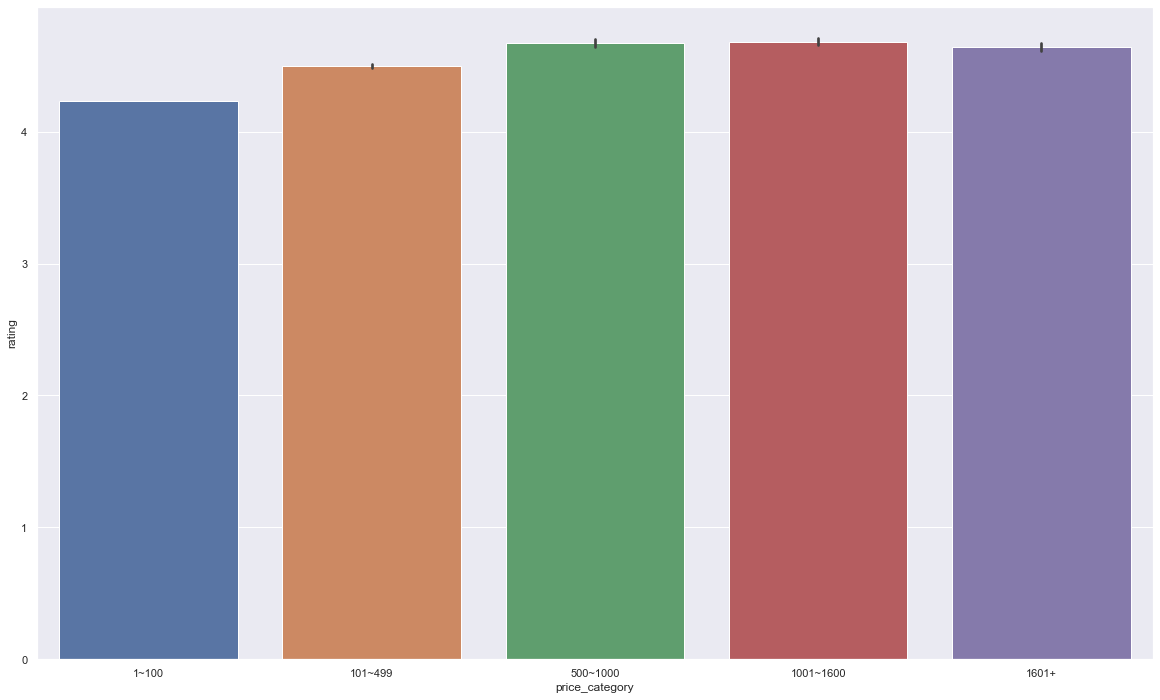

In [100]:
sns.barplot(data =red, x = "price_category", y = "rating", order=['1~100','101~499','500~1000','1001~1600','1601+'])
plt.show()

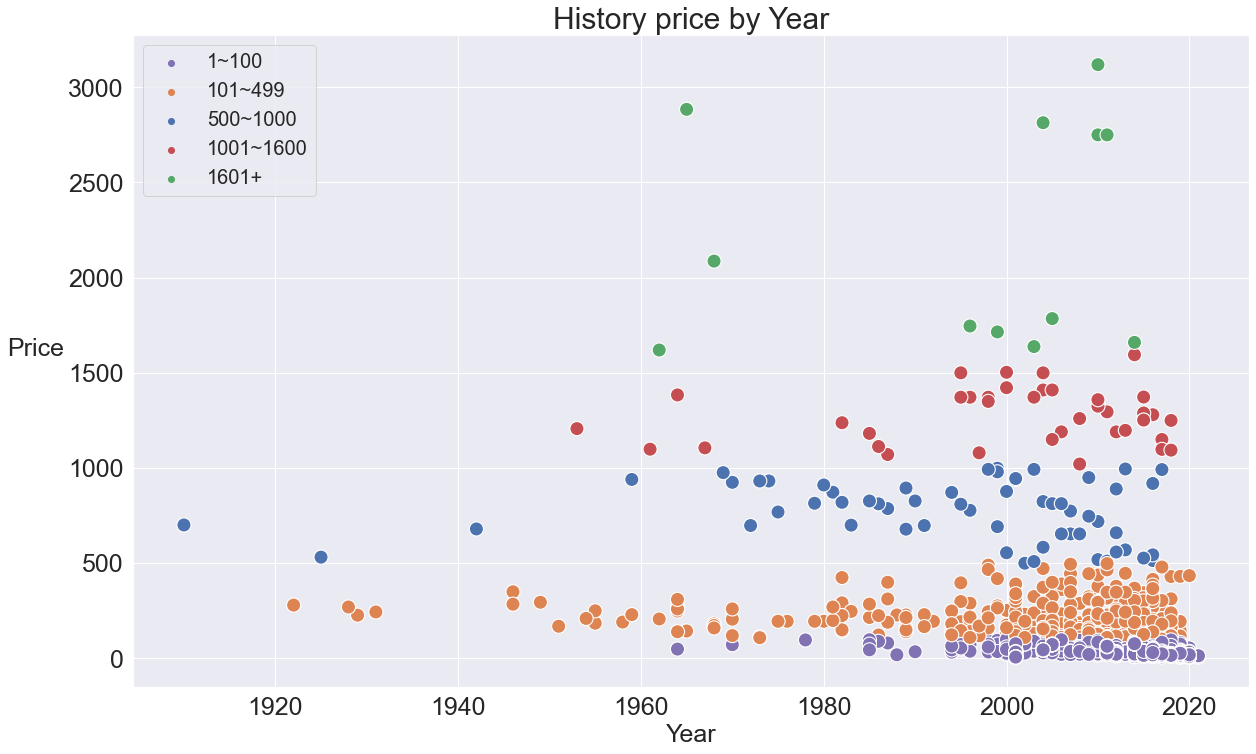

In [101]:
sns.scatterplot(data = red, x = "year", y = "price", hue = "price_category", s = 200)
#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
sns.set(rc = {'figure.figsize':(20,12)})
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.ylabel("Price", fontsize = 25, rotation = 0, ha = "right")
plt.xlabel("Year", fontsize = 25)
plt.legend(loc = "upper left", fontsize = 20)
plt.rc("legend", fontsize = 20)
plt.title("History price by Year", fontsize = 30)

#specify order of items in legend
#order = ['1~100','101~499','500~1000','1001~1600','1601+']
order = [4,1,0,3,2]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
#red.corr()
plt.show()

In [102]:
# Correlation for luxury wines
red.loc[red.price_category == "1601+"].corr()

,year,rating,num_reviews,price,body,acidity
year,1.000000,-0.588111,-0.688705,0.133116,-0.603538,NaN
rating,-0.588111,1.000000,0.494170,-0.278589,0.460287,NaN
num_reviews,-0.688705,0.494170,1.000000,-0.487005,0.815741,NaN
price,0.133116,-0.278589,-0.487005,1.000000,-0.443405,NaN
body,-0.603538,0.460287,0.815741,-0.443405,1.000000,NaN
acidity,NaN,NaN,NaN,NaN,NaN,NaN


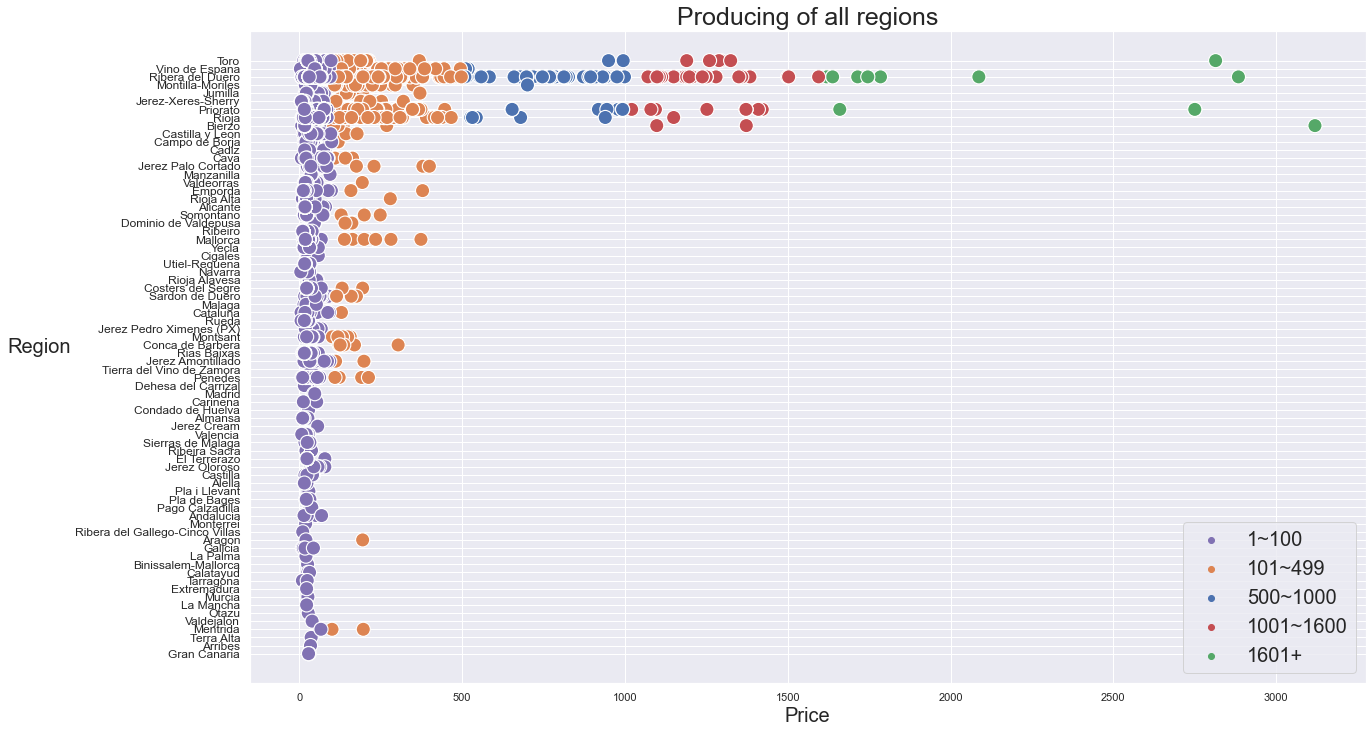

In [105]:
sns.scatterplot(data = red, y = "region", x = "price", hue = "price_category", s = 200)
plt.ylabel("Region", fontsize = 20,rotation = 0, ha = "right")
plt.xlabel("Price", fontsize = 20)
plt.yticks(fontsize = 12)
plt.title("Producing of all regions", fontsize = 25)

order = [4,1,0,3,2]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
#red.corr()

plt.show()

In [107]:
# Count bottles for each region
red.groupby("region").count().price.sort_values(ascending = False)[0:20]

region
Rioja                 2350
Ribera del Duero      1411
Priorato               686
Toro                   300
Vino de Espana         262
Rias Baixas            251
Jerez-Xeres-Sherry     247
Bierzo                 241
Mallorca               237
Alicante               232
Costers del Segre      232
Ribeiro                228
El Terrerazo           222
Castilla y Leon         49
Cava                    34
Montilla-Moriles        26
Jumilla                 26
Emporda                 25
Penedes                 22
Montsant                20
Name: price, dtype: int64

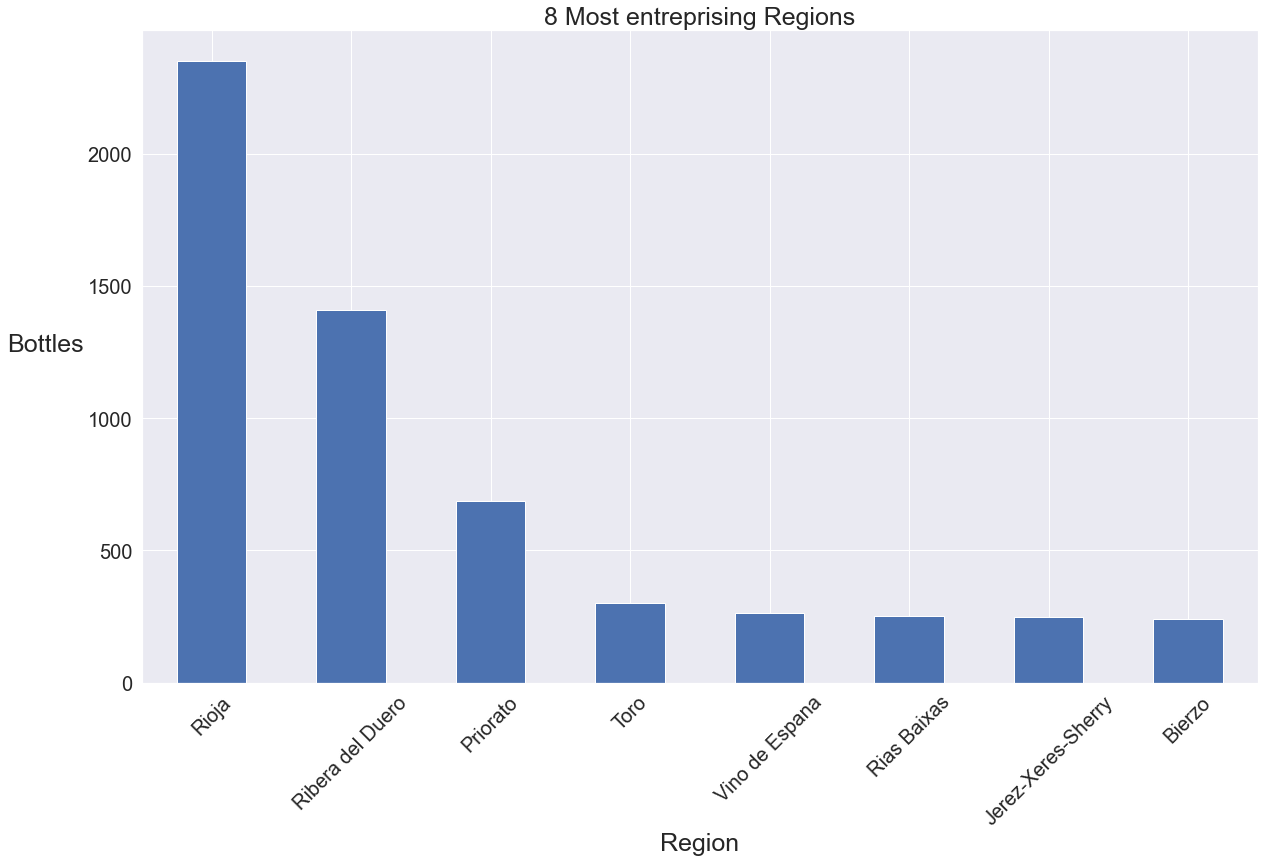

In [108]:
red.groupby("region").count().price.sort_values(ascending = False)[0:8].plot(kind = "bar")
plt.xticks(rotation = 45, fontsize = 20)
plt.yticks( fontsize = 20)
plt.xlabel("Region", fontsize = 25)
plt.ylabel("Bottles", fontsize = 25, rotation = 0, ha = "right")
plt.title("8 Most entreprising Regions", fontsize = 25)
plt.show()

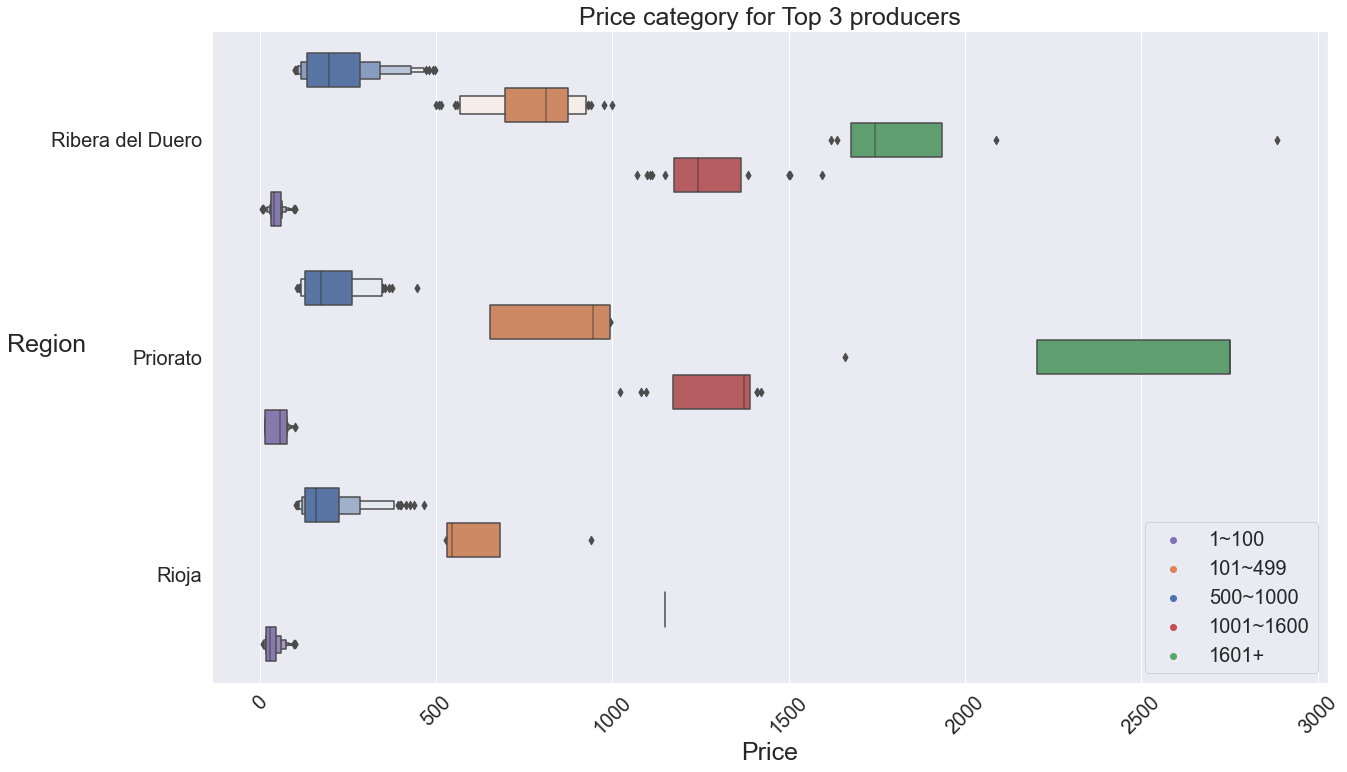

In [109]:
sns.boxenplot(data = red.loc[red.region.isin(["Rioja", "Ribera del Duero", "Priorato"])] ,
                           x = "price", y = "region", hue = "price_category")
plt.xticks(rotation = 45, fontsize = 20)
plt.yticks( fontsize = 20)
plt.xlabel("Price", fontsize = 25)
plt.ylabel("Region", fontsize = 25, rotation = 0)
plt.title("Price category for Top 3 producers", fontsize = 25)

order = [4,1,0,3,2]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
#red.corr()
plt.show()

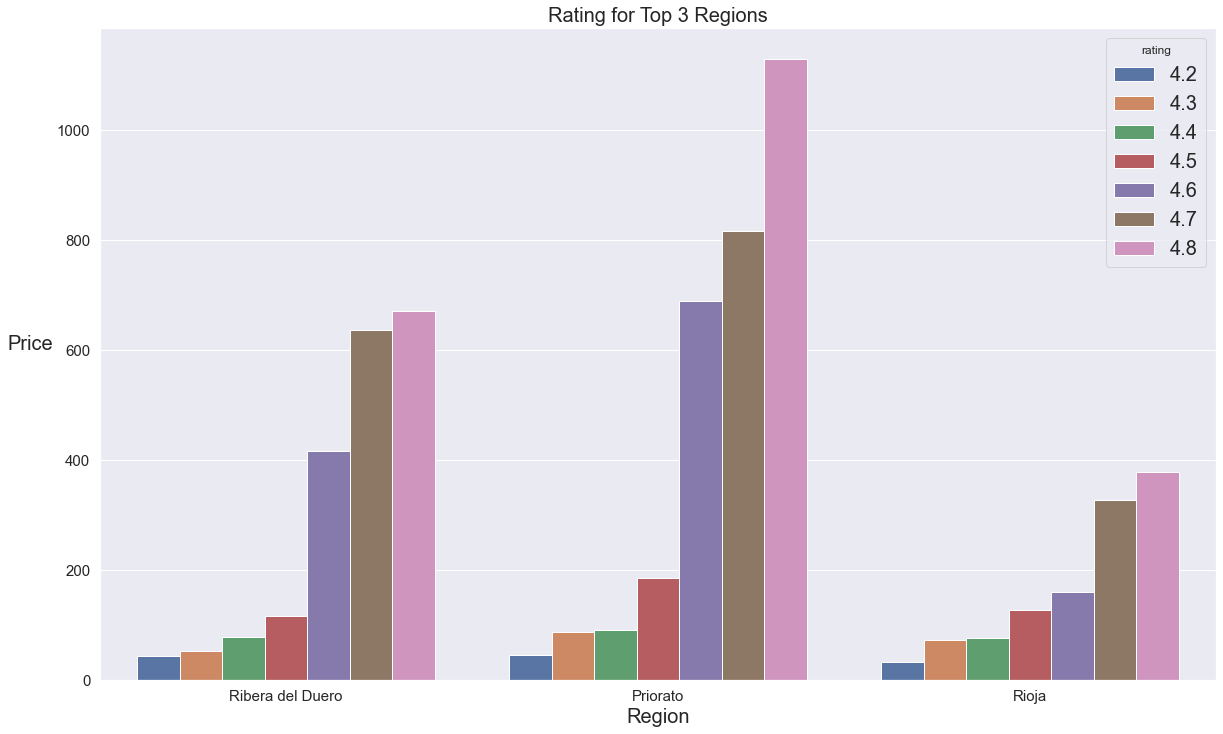

In [110]:
sns.barplot(data = red.loc[red.region.isin(["Rioja", "Ribera del Duero", "Priorato"])] ,
                           y = "price", x = "region", hue = "rating", ci = None)
plt.xlabel("Region", fontsize = 20)
plt.ylabel("Price", fontsize = 20, rotation = 0, ha = "right")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Rating for Top 3 Regions", fontsize = 20)
plt.show()

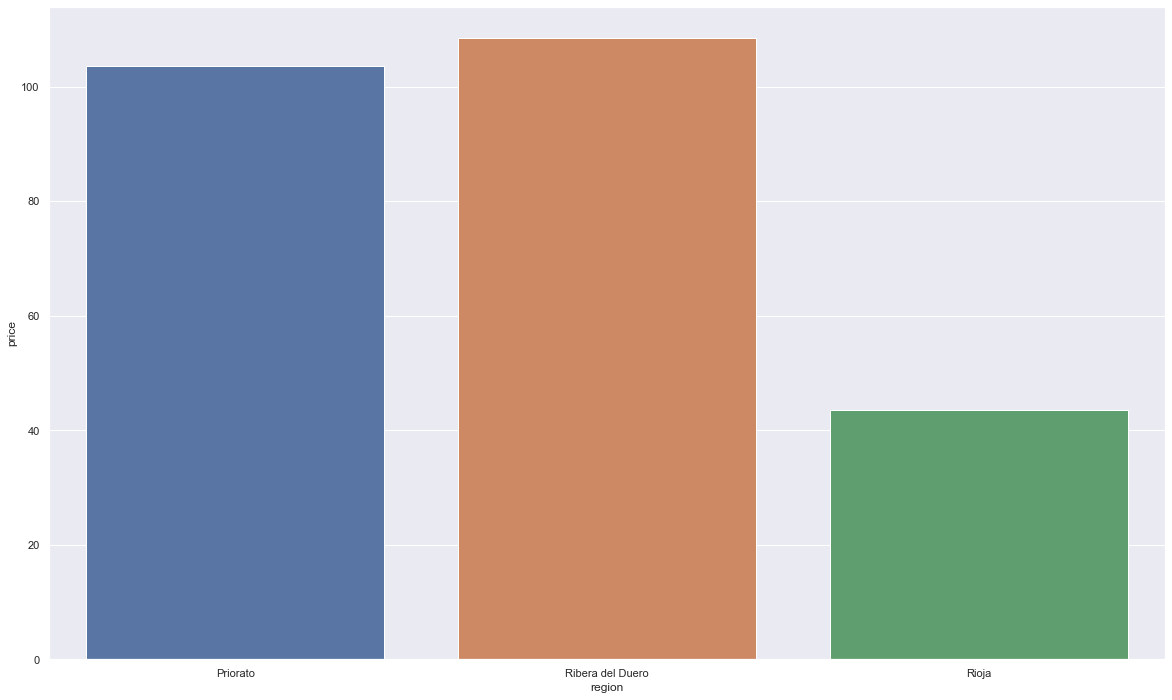

In [112]:
sns.barplot(data = red.loc[red.region.isin(["Rioja", "Ribera del Duero", "Priorato"])].sort_values(["region","price"]) ,
                           x = "region", y = "price", ci = None)
plt.show()

In [113]:
red.loc[red.region.isin(["Rioja", "Ribera del Duero", "Priorato"])].sort_values(["region","price"]).price.nlargest()

196    2884
280    2750
343    2750
92     2087
188    1785
Name: price, dtype: int64

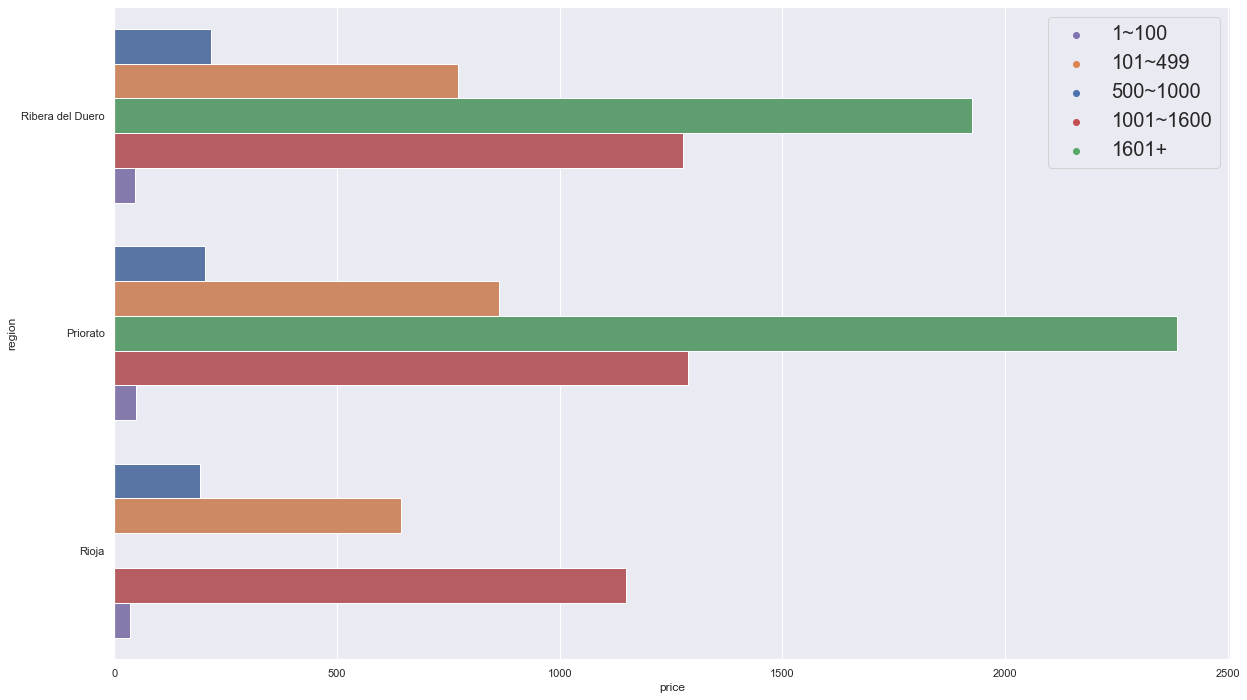

In [114]:
sns.barplot(data = red.loc[red.region.isin(["Rioja", "Ribera del Duero", "Priorato"])] ,
                           x = "price", y = "region", hue = "price_category", ci = None)
order = [4,1,0,3,2]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
plt.show()

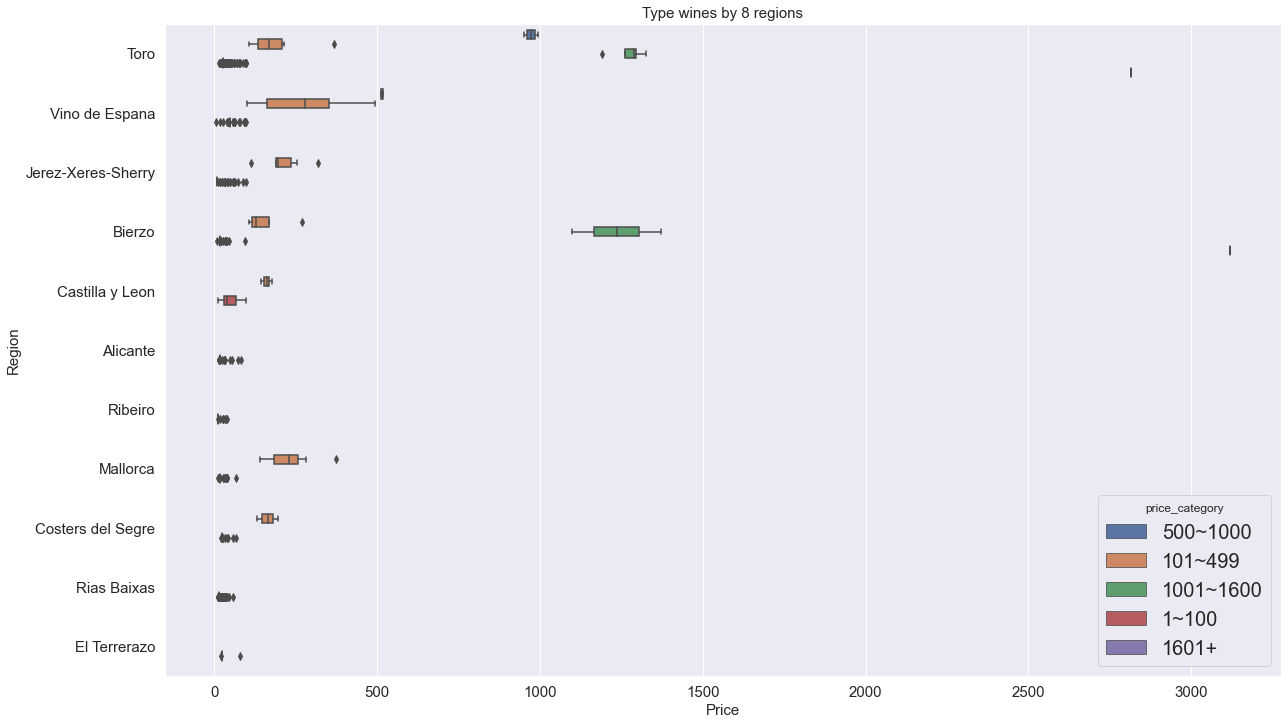

In [136]:
sns.boxplot(data = red.loc[red.region.isin(["Toro",
"Vino de Espana",
"Rias Baixas",
"Jerez-Xeres-Sherry", 
"Bierzo",                                           
"Mallorca",
"Alicante",
"Costers del Segre",
"Ribeiro",
"El Terrerazo",
"Castilla y Leon"])] ,
                           x = "price", y = "region", hue = "price_category")
plt.title("Type wines by 8 regions", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel("Region", fontsize = 15)
plt.xlabel("Price", fontsize = 15)
plt.show()

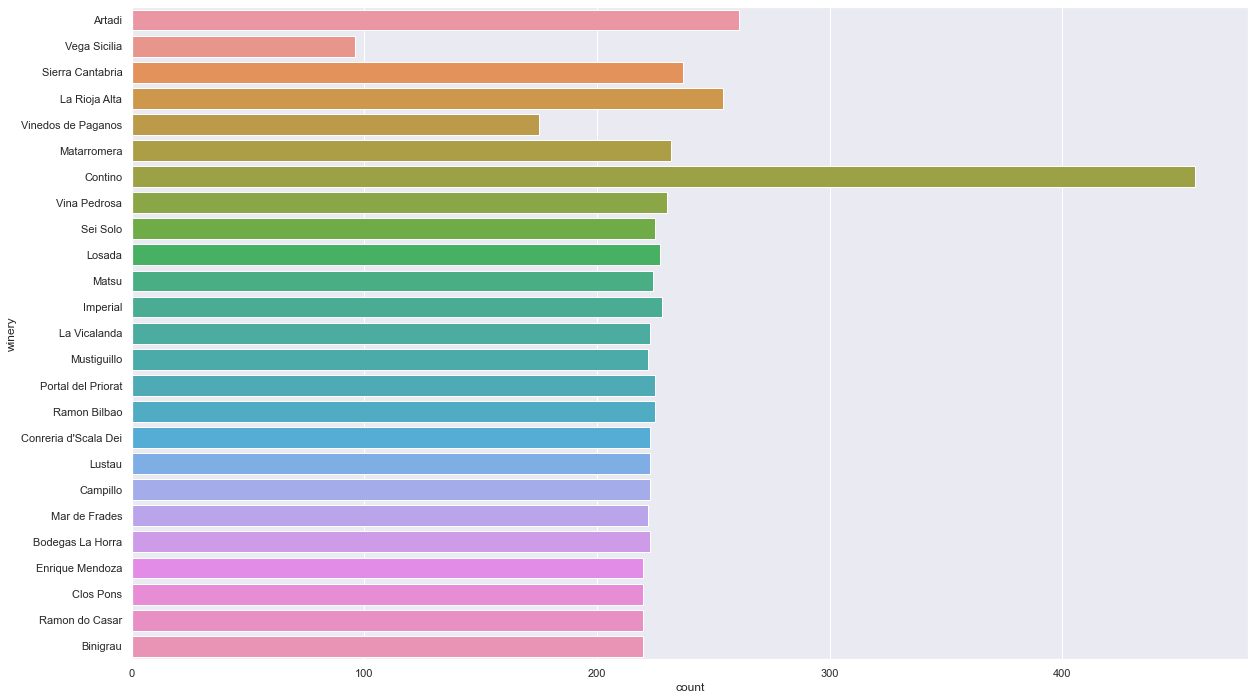

In [135]:
# Wineries who sell more than 200 bottles
sns.countplot(data = red.loc[red.winery.isin(cont.index)], y = "winery")
plt.show()

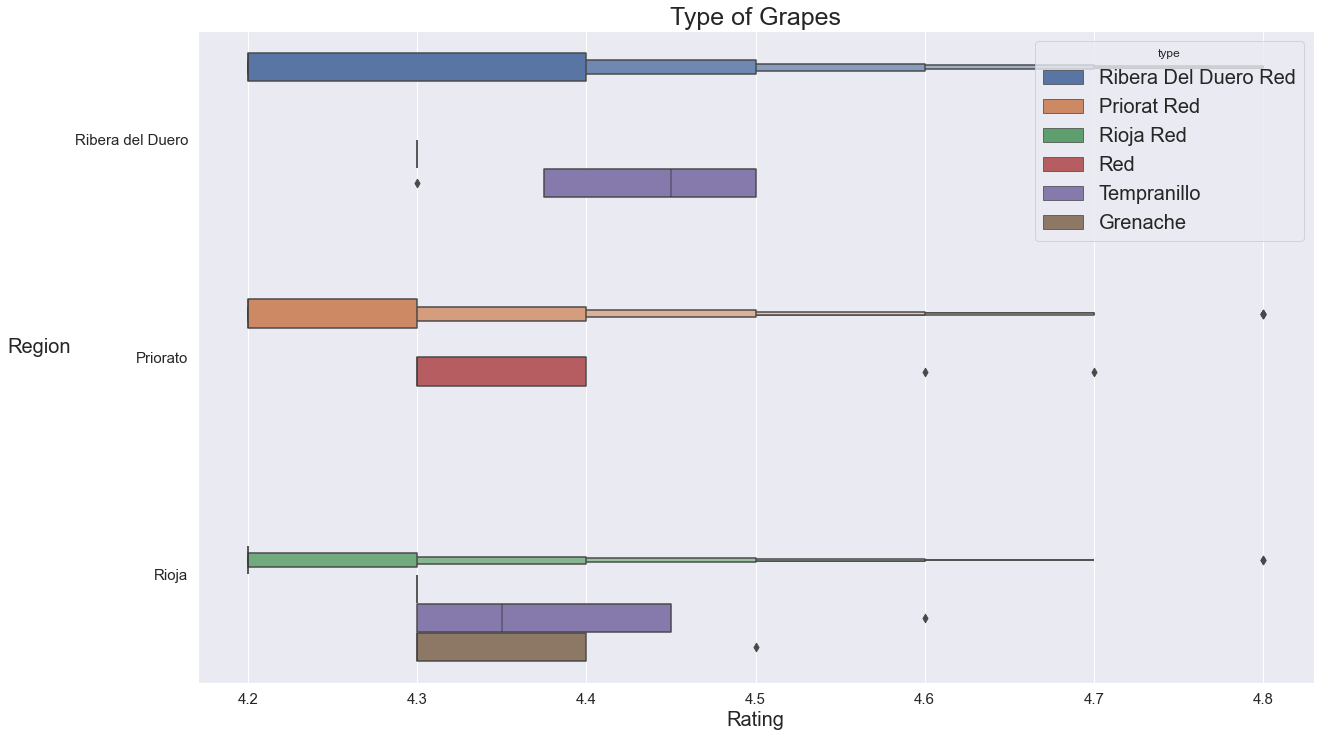

In [124]:
sns.boxenplot(data = red.loc[red.region.isin(["Rioja", "Ribera del Duero", "Priorato"])] ,
                           x = "rating", y = "region", hue = "type")
plt.title("Type of Grapes", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Rating", fontsize = 20)
plt.ylabel("Region", fontsize = 20,rotation = 0, ha = "right")
plt.show()

In [125]:
boom = red.loc[red.region.isin(["Rioja", "Ribera del Duero"])]

/var/folders/xf/_9db89vs2kz_xgykl0vhztn80000gn/T/ipykernel_11579/2882194054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bm1.year = bm1.year.astype(object)


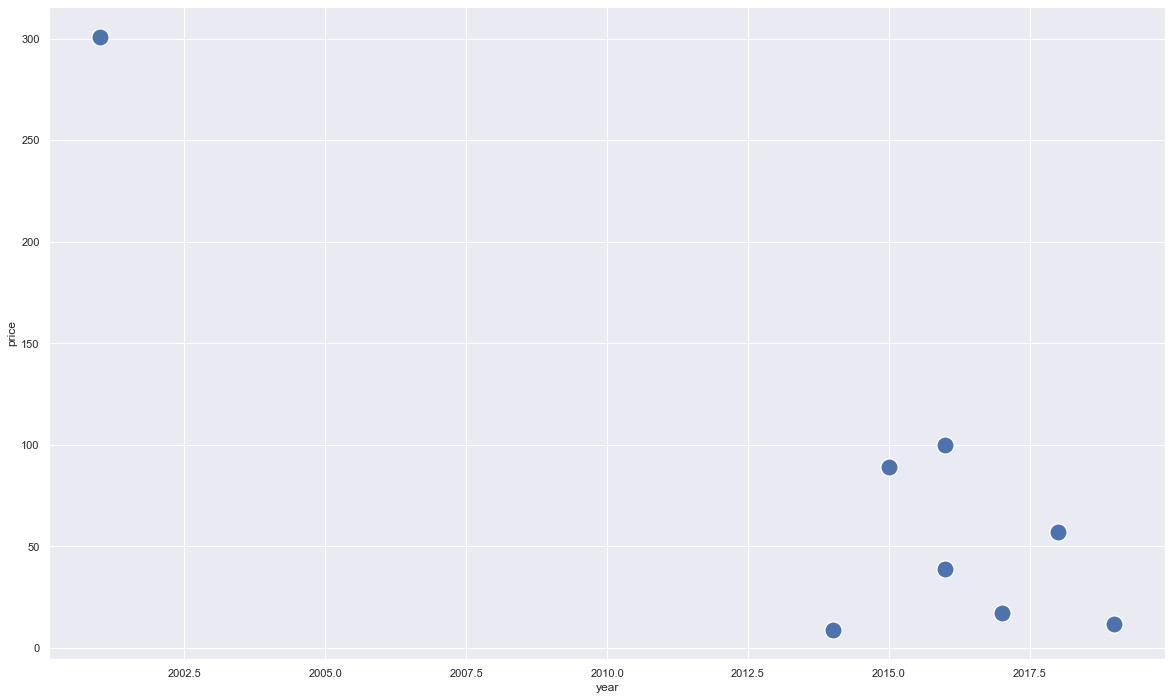

In [127]:
# Looking throw Tempranillo grape type by price and year
bm1 = boom.loc[boom.type == "Tempranillo"]
bm1.year = bm1.year.astype(object)
sns.scatterplot(data = bm1, y = "price", x = "year", s = 300)
plt.show()

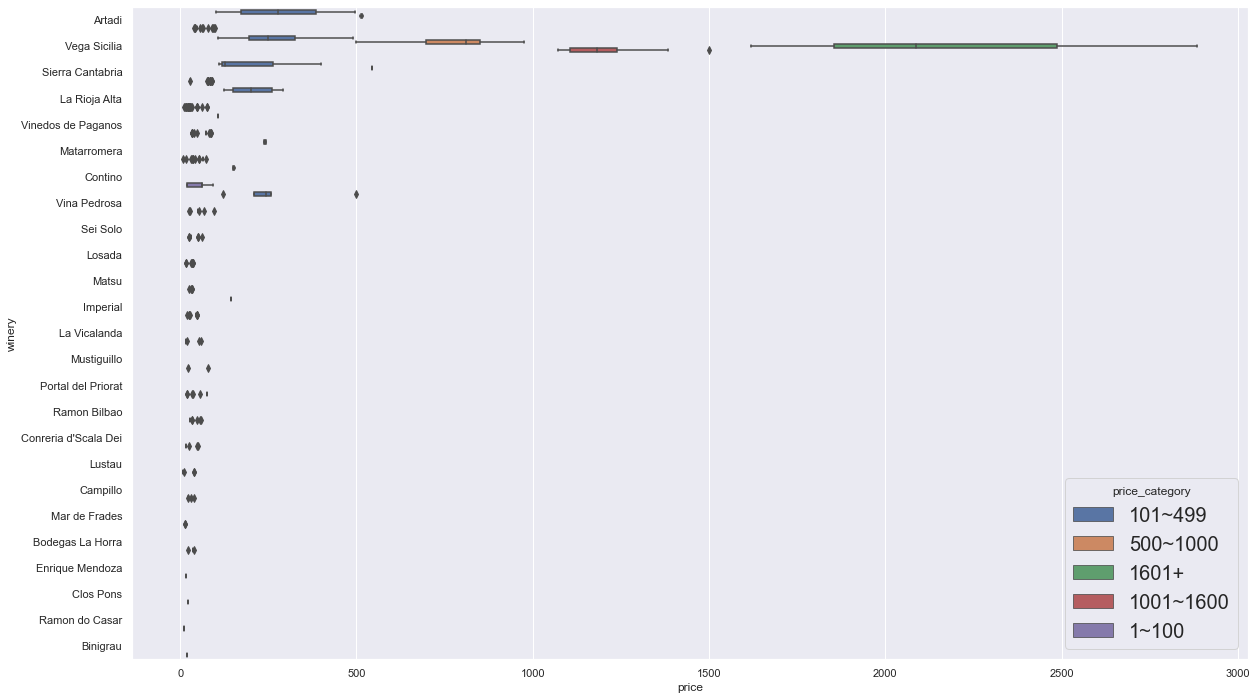

In [137]:
# Total wineries who produce less than 50 bottles 
sns.boxplot(data = red.loc[red.winery.isin(cont.index)], y = "winery", x = "price", hue = "price_category")
plt.show()

In [129]:
cont = pd.DataFrame(red.winery.value_counts(ascending = False))

In [130]:
cont = cont.loc[cont.winery >= 50]

In [131]:
cont.index

Index(['Contino', 'Artadi', 'La Rioja Alta', 'Sierra Cantabria', 'Matarromera',
       'Vina Pedrosa', 'Imperial', 'Losada', 'Sei Solo', 'Ramon Bilbao',
       'Portal del Priorat', 'Matsu', 'Lustau', 'Bodegas La Horra', 'Campillo',
       'La Vicalanda', 'Conreria d'Scala Dei', 'Mustiguillo', 'Mar de Frades',
       'Binigrau', 'Enrique Mendoza', 'Ramon do Casar', 'Clos Pons',
       'Vinedos de Paganos', 'Vega Sicilia'],
      dtype='object')

In [112]:
red.loc[red.winery.isin(cont.index)]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,price_category
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313,Tempranillo,4.0,2.0,101~499
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324,Ribera Del Duero Red,5.0,3.0,101~499
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692,Ribera Del Duero Red,5.0,3.0,500~1000
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778,Ribera Del Duero Red,5.0,3.0,500~1000
5,Vega Sicilia,Unico,1998,4.8,1209,Espana,Ribera del Duero,490,Ribera Del Duero Red,5.0,3.0,101~499
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19,Rioja Red,4.0,3.0,1~100
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16,Priorat Red,4.0,3.0,1~100
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24,Red,4.0,3.0,1~100
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64,Ribera Del Duero Red,5.0,3.0,1~100


In [113]:
red.num_reviews

0         58
1         31
2       1793
3       1705
4       1309
        ... 
7495     392
7496     390
7497     390
7498     389
7499     388
Name: num_reviews, Length: 7384, dtype: int64

(0.0, 100.0)

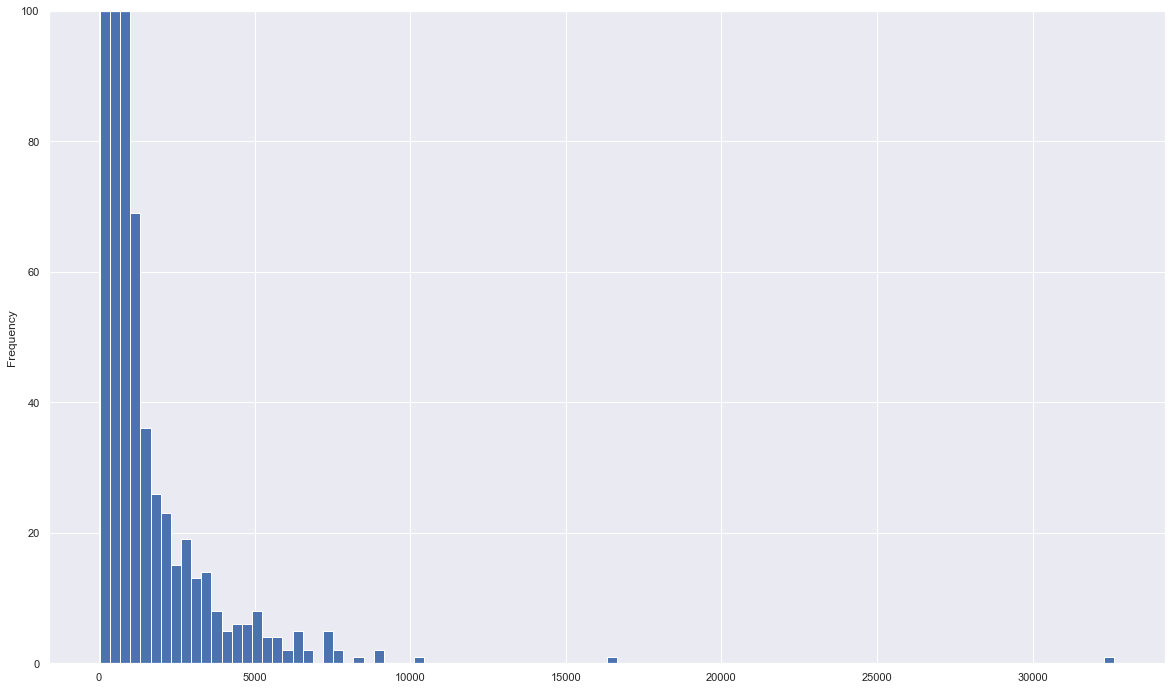

In [138]:
red.num_reviews.plot(kind = "hist", bins = 100)
plt.ylim(0,100)

<AxesSubplot:xlabel='num_reviews'>

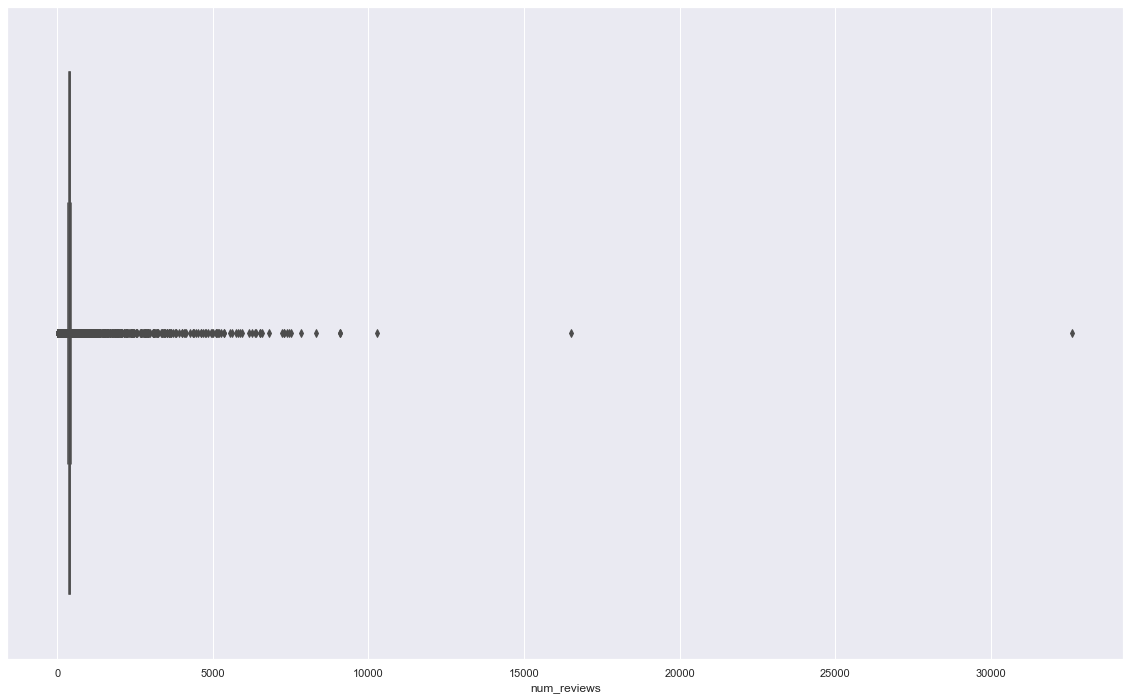

In [139]:
# Count reviews for 1 bottle 
sns.boxplot(data = red, x = "num_reviews")

In [140]:
# Top 5 bottles by review 
red.loc[red.num_reviews.nlargest().index]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,price_category
1822,Felix Solis,Mucho Mas Tinto,2001,4.2,32624,Espana,Vino de Espana,4,Red,4.0,3.0,1~100
1823,Marques de Riscal,Rioja Reserva,2016,4.2,16505,Espana,Rioja,15,Rioja Red,4.0,3.0,1~100
1114,La Rioja Alta,Vina Ardanza Reserva,2009,4.3,10273,Espana,Rioja,24,Rioja Red,4.0,3.0,1~100
1824,La Rioja Alta,Vina Ardanza Reserva,2007,4.2,9098,Espana,Rioja,23,Rioja Red,4.0,3.0,1~100
1115,La Rioja Alta,Vina Ardanza Reserva,2012,4.3,9092,Espana,Rioja,20,Rioja Red,4.0,3.0,1~100


In [141]:
red.loc[red.num_reviews.nsmallest().index]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,price_category
345,Vina Pedrosa,40 Aniversario Gran Reserva,2012,4.6,25,Espana,Ribera del Duero,95,Ribera Del Duero Red,5.0,3.0,1~100
346,Osborne,Solera BC-200,2001,4.6,25,Espana,Jerez-Xeres-Sherry,197,Sherry,4.0,3.0,101~499
347,Recaredo,Corpinnat Enoteca Reserva Particular de Recaredo,2004,4.6,25,Espana,Cataluna,130,Sparkling,2.0,3.0,101~499
348,Toro Albala,Don PX Pedro Ximenez,1968,4.6,25,Espana,Montilla-Moriles,181,Pedro Ximenez,5.0,1.0,101~499
630,Pedralonga,Vendetta,2013,4.5,25,Espana,Rias Baixas,38,Albarino,0.0,0.0,1~100


In [142]:
red.loc[red.price_category == ("1601+")]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,price_category
16,Vega Sicilia,Unico,1962,4.8,295,Espana,Ribera del Duero,1620,Ribera Del Duero Red,5.0,3.0,1601+
92,Vega Sicilia,Unico,1968,4.7,225,Espana,Ribera del Duero,2087,Ribera Del Duero Red,5.0,3.0,1601+
98,Dominio de Pingus,Pingus,1999,4.7,184,Espana,Ribera del Duero,1715,Ribera Del Duero Red,5.0,3.0,1601+
115,Bodega Numanthia,Termanthia,2004,4.7,108,Espana,Toro,2814,Toro Red,5.0,3.0,1601+
188,Dominio de Pingus,Pingus,2005,4.6,293,Espana,Ribera del Duero,1785,Ribera Del Duero Red,5.0,3.0,1601+
196,Vega Sicilia,Unico,1965,4.6,218,Espana,Ribera del Duero,2884,Ribera Del Duero Red,5.0,3.0,1601+
199,Dominio de Pingus,Pingus,2003,4.6,205,Espana,Ribera del Duero,1638,Ribera Del Duero Red,5.0,3.0,1601+
248,Dominio de Pingus,Pingus,1996,4.6,102,Espana,Ribera del Duero,1746,Ribera Del Duero Red,5.0,3.0,1601+
280,Alvaro Palacios,L'Ermita Velles Vinyes Priorat,2010,4.6,60,Espana,Priorato,2750,Priorat Red,4.0,3.0,1601+
332,Alvaro Palacios,L'Ermita Velles Vinyes Priorat,2014,4.6,30,Espana,Priorato,1660,Priorat Red,4.0,3.0,1601+


In [143]:
red.winery.value_counts().head(35)

Contino                 457
Artadi                  261
La Rioja Alta           254
Sierra Cantabria        237
Matarromera             232
Vina Pedrosa            230
Imperial                228
Losada                  227
Sei Solo                225
Ramon Bilbao            225
Portal del Priorat      225
Matsu                   224
Lustau                  223
Bodegas La Horra        223
Campillo                223
La Vicalanda            223
Conreria d'Scala Dei    223
Mustiguillo             222
Mar de Frades           222
Binigrau                220
Enrique Mendoza         220
Ramon do Casar          220
Clos Pons               220
Vinedos de Paganos      175
Vega Sicilia             96
Alvaro Palacios          48
Dominio de Pingus        31
Martinet                 30
Marques de Murrieta      30
Vina Sastre              25
Emilio Moro              25
Bodegas Roda             23
Toro Albala              23
Muga                     23
Abadia Retuerta          22
Name: winery, dtype:

In [145]:
#red.loc[red.winery == "Matarromera"]

In [144]:
#red.loc[red.region == "Vino de Espana"].winery